# Variación espacial y temporal de nutrientes en el Río de la Plata entre 2005-2020


In [1]:
#import our libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import plotly.graph_objects as go
import plotly.express as px
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile

In [3]:
#import the data file (delimited coordinates of our site of interest)
url="Data/Rio_de_la_Plata/cmems_mod_glo_bgc_my_0.25_P1M-m_1655322846351-cortado.nc"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (time: 192, latitude: 25, longitude: 41, depth: 1)
Coordinates:
  * latitude   (latitude) float32 -39.0 -38.75 -38.5 ... -33.5 -33.25 -33.0
  * depth      (depth) float32 0.5058
  * time       (time) datetime64[ns] 2005-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -59.0 -58.75 -58.5 ... -49.5 -49.25 -49.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    no3        (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    ph         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
    fe         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [4]:
#checking the latitudes
ds.latitude

<xarray.DataArray 'latitude' (latitude: 25)>
array([-39.  , -38.75, -38.5 , -38.25, -38.  , -37.75, -37.5 , -37.25, -37.  ,
       -36.75, -36.5 , -36.25, -36.  , -35.75, -35.5 , -35.25, -35.  , -34.75,
       -34.5 , -34.25, -34.  , -33.75, -33.5 , -33.25, -33.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -39.0 -38.75 -38.5 ... -33.5 -33.25 -33.0
Attributes:
    valid_min:            -39.0
    valid_max:            -33.0
    step:                 0.25
    units:                degrees_north
    unit_long:            Degrees North
    long_name:            Latitude
    standard_name:        latitude
    axis:                 Y
    _ChunkSizes:          681
    _CoordinateAxisType:  Lat

In [5]:
#checking longitudes
ds.longitude

<xarray.DataArray 'longitude' (longitude: 41)>
array([-59.  , -58.75, -58.5 , -58.25, -58.  , -57.75, -57.5 , -57.25, -57.  ,
       -56.75, -56.5 , -56.25, -56.  , -55.75, -55.5 , -55.25, -55.  , -54.75,
       -54.5 , -54.25, -54.  , -53.75, -53.5 , -53.25, -53.  , -52.75, -52.5 ,
       -52.25, -52.  , -51.75, -51.5 , -51.25, -51.  , -50.75, -50.5 , -50.25,
       -50.  , -49.75, -49.5 , -49.25, -49.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -59.0 -58.75 -58.5 ... -49.5 -49.25 -49.0
Attributes:
    valid_min:            -59.0
    valid_max:            -49.0
    step:                 0.25
    units:                degrees_east
    unit_long:            Degrees East
    long_name:            Longitude
    standard_name:        longitude
    axis:                 X
    _ChunkSizes:          1440
    _CoordinateAxisType:  Lon

**Variación anual de nutrientes**

In [7]:
# grouping the data by year, between 2005-2020
mean= ds.groupby("time.year").mean()
mean.year

<xarray.DataArray 'year' (year: 16)>
array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)
Coordinates:
  * year     (year) int64 2005 2006 2007 2008 2009 ... 2016 2017 2018 2019 2020

In [8]:
#numerical analysis

# un promedio espacial por mes 
prom = ds.mean(dim=('latitude','longitude','depth'), skipna=None) #promedio en xarray
df_prom = prom.to_dataframe() #pasar a pandas df
df_prom = df_prom.reset_index()

# una mediana espacial por mes
mediana = ds.median(dim=('latitude','longitude','depth'), skipna=None) #mediana
df_mediana = mediana.to_dataframe() #pasar a pandas df
df_mediana = df_mediana.reset_index()

# desviación estándar cada mes 
std = ds.std(dim=('latitude','longitude','depth'), skipna=None) #desviación estándar
df_std = std.to_dataframe() #pasar a pandas df
df_std = df_std.reset_index()

Text(0, 0.5, 'Nitrate (mmol/$m^3$)')

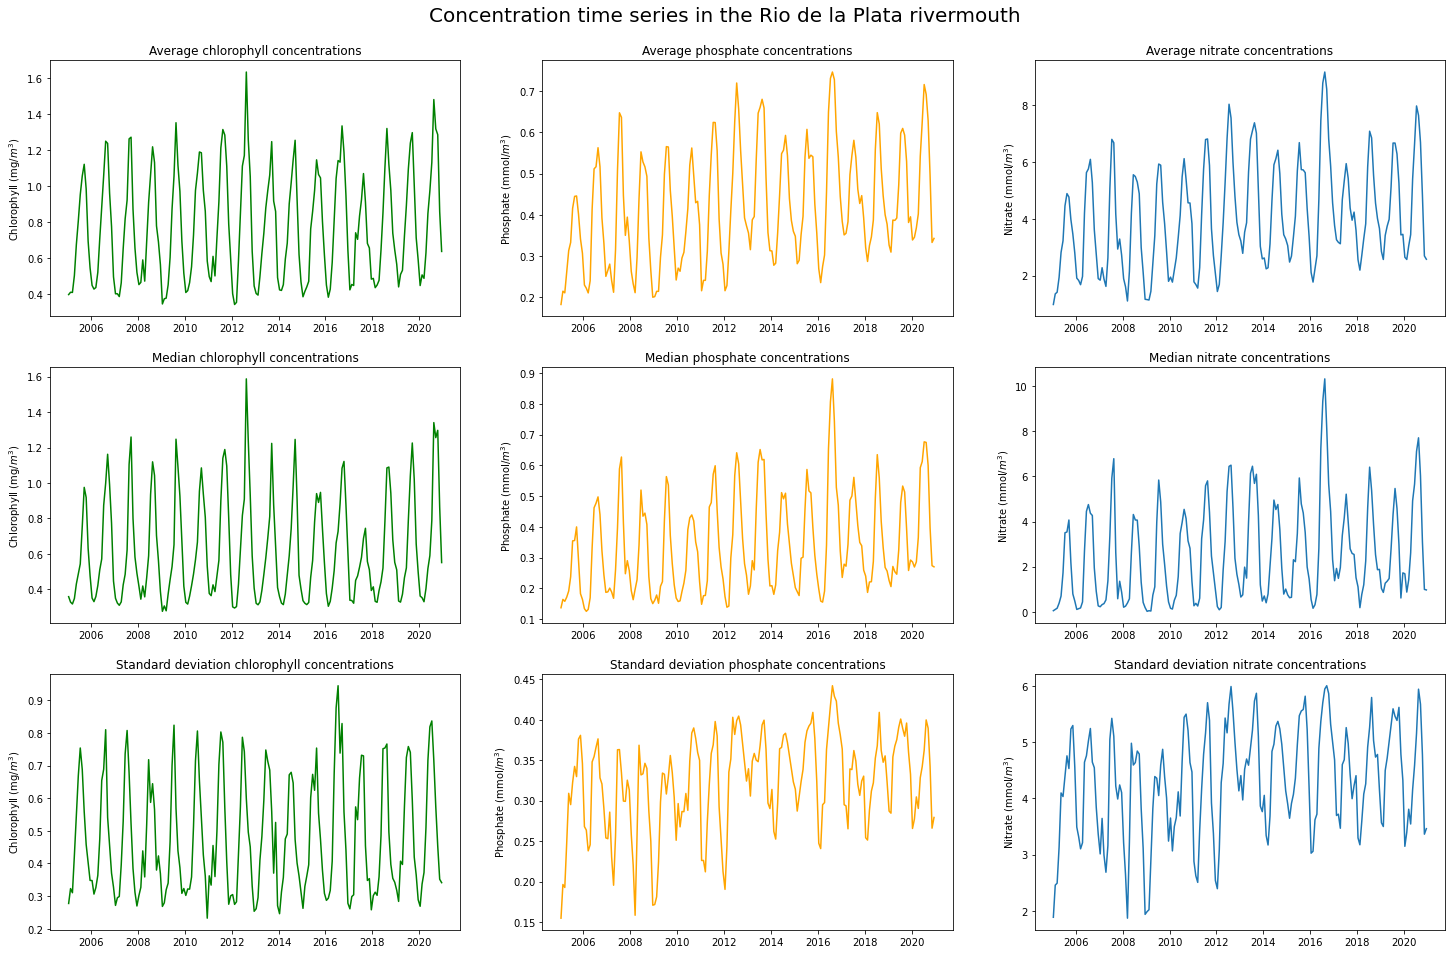

In [9]:
#Exploring variation
# How do these concentrations very with time? 

# PLOT TIME SERIES (averaged over space)
fig, axs = plt.subplots(3, 3, figsize=(25,15))
fig.suptitle('Concentration time series in the Rio de la Plata rivermouth', fontsize=20)
plt.subplots_adjust(top=0.93)

######## For averages #########
#chlorophyll
axs[0, 0].plot(df_prom['time'], df_prom['chl'], 'green')
axs[0, 0].set_title('Average chlorophyll concentrations')
axs[0, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[0, 1].plot(df_prom['time'], df_prom['po4'], 'orange')
axs[0, 1].set_title('Average phosphate concentrations')
axs[0, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[0, 2].plot(df_prom['time'], df_prom['no3'])
axs[0, 2].set_title('Average nitrate concentrations')
axs[0, 2].set_ylabel("Nitrate (mmol/$m^3$)") 

######## For median values #########
#chlorophyll
axs[1, 0].plot(df_mediana['time'], df_mediana['chl'], 'green')
axs[1, 0].set_title('Median chlorophyll concentrations')
axs[1, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[1, 1].plot(df_mediana['time'], df_mediana['po4'], 'orange')
axs[1, 1].set_title('Median phosphate concentrations')
axs[1, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[1, 2].plot(df_mediana['time'], df_mediana['no3'])
axs[1, 2].set_title('Median nitrate concentrations')
axs[1, 2].set_ylabel("Nitrate (mmol/$m^3$)") 

######## For standard deviations #########
#chlorophyll
axs[2, 0].plot(df_std['time'], df_std['chl'], 'green')
axs[2, 0].set_title('Standard deviation chlorophyll concentrations')
axs[2, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[2, 1].plot(df_std['time'], df_std['po4'], 'orange')
axs[2, 1].set_title('Standard deviation phosphate concentrations')
axs[2, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[2, 2].plot(df_std['time'], df_std['no3'])
axs[2, 2].set_title('Standard deviation nitrate concentrations')
axs[2, 2].set_ylabel("Nitrate (mmol/$m^3$)") 



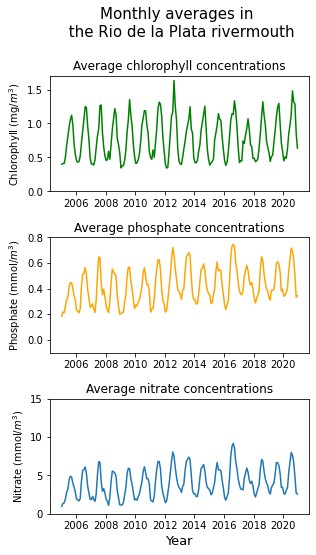

In [64]:
# we choose to continue with the average only

# PLOT TIME SERIES (averaged over space)
fig, axs = plt.subplots(3, 1, figsize=(4.5,8))
fig.suptitle('Monthly averages in \n the Rio de la Plata rivermouth', fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.86, 
                    wspace=0.4, 
                    hspace=0.4)

######## For averages #########
#chlorophyll
axs[0].plot(df_prom['time'], df_prom['chl'], 'green')
axs[0].set_ylim(0, 1.7)
axs[0].set_title('Average chlorophyll concentrations')
axs[0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[1].plot(df_prom['time'], df_prom['po4'], 'orange')
axs[1].set_ylim(-0.1, 0.8)
axs[1].set_title('Average phosphate concentrations')
axs[1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[2].plot(df_prom['time'], df_prom['no3'])
axs[2].set_ylim(0, 15)
axs[2].set_title('Average nitrate concentrations')
axs[2].set_ylabel("Nitrate (mmol/$m^3$)") 
axs[2].set_xlabel("Year", fontsize=13) 

plt.savefig('rio_de_la_plata_timeseries.png', dpi=500, bbox_inches='tight')


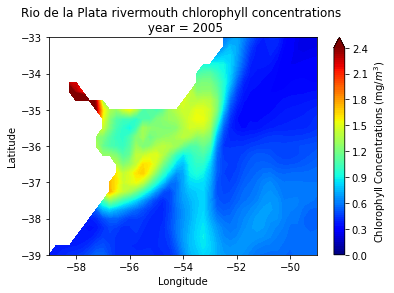

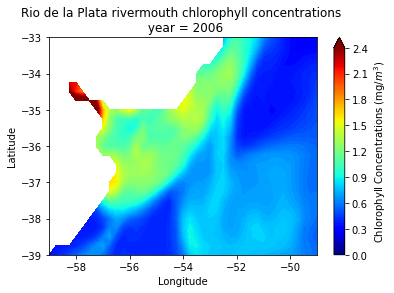

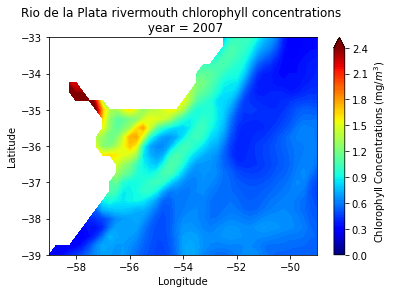

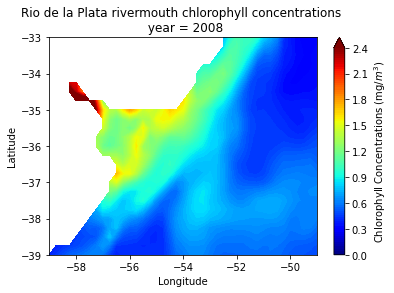

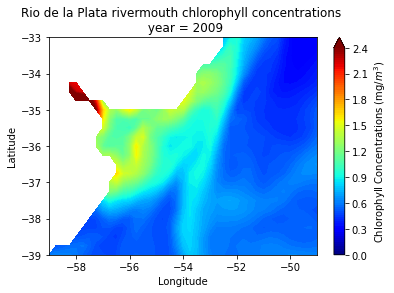

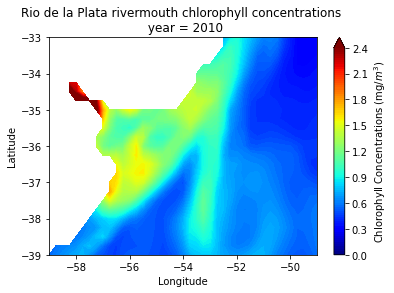

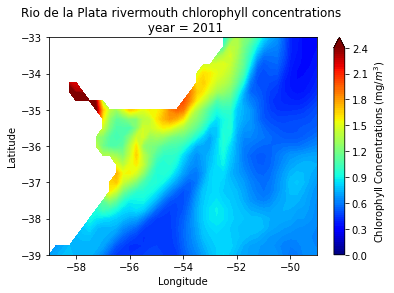

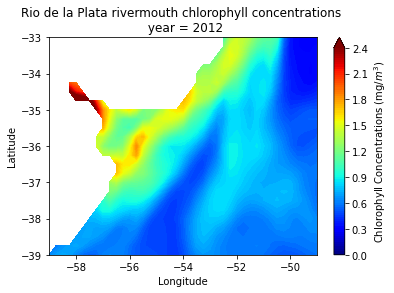

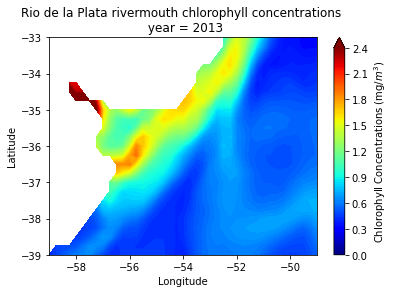

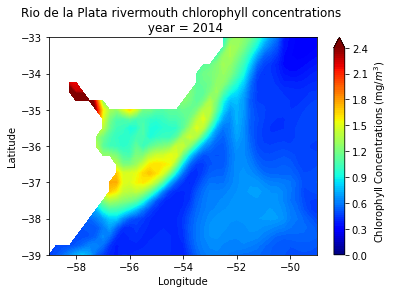

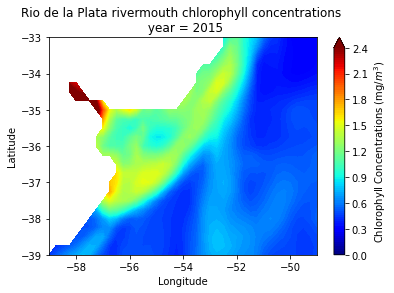

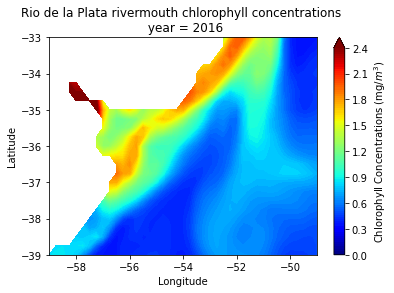

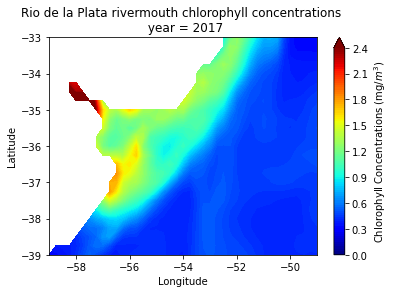

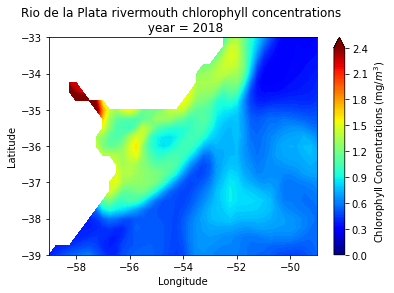

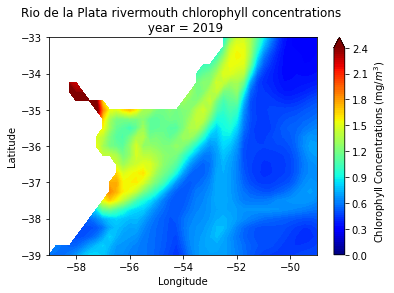

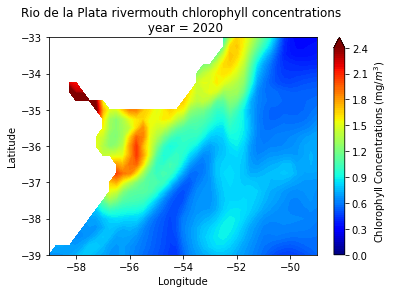

In [17]:
# Creating chlorophyll plots for each year
tick = [0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    mean.chl.isel(year=i, depth=0).plot.contourf(
        vmin=0, vmax=2.4, levels=100, cmap = 'jet',
        cbar_kwargs={"label": "Chlorophyll Concentrations (mg/$m^3$)", 'ticks': tick}
        )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Rio de la Plata rivermouth chlorophyll concentrations \n year = {}'.format(i+2005))
    
    #plt.savefig("clorofila_{}".format(i), dpi=500)
    plt.show()
    plt.close("all")

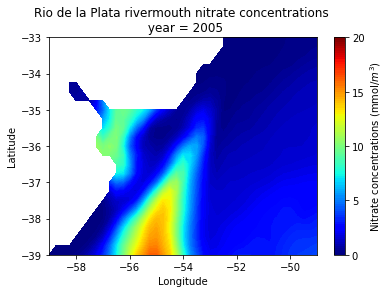

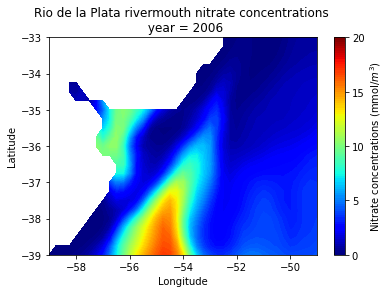

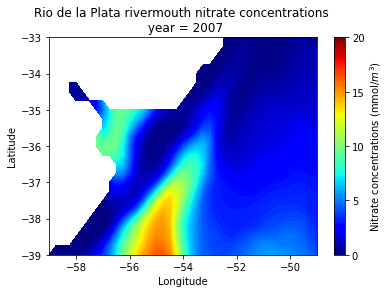

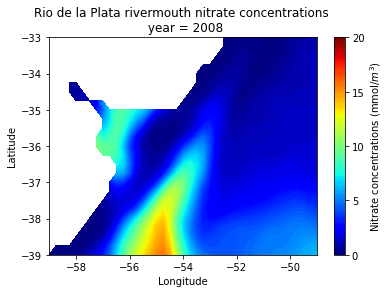

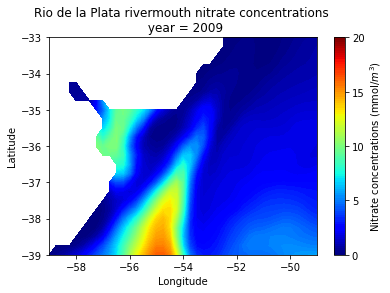

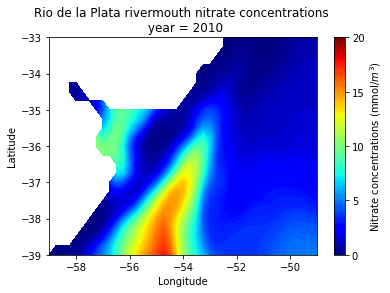

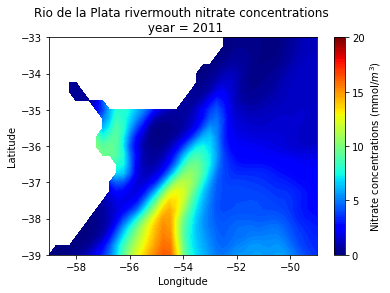

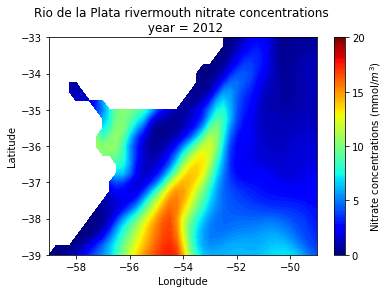

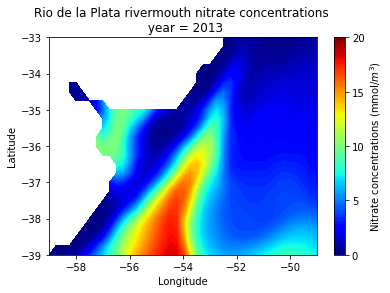

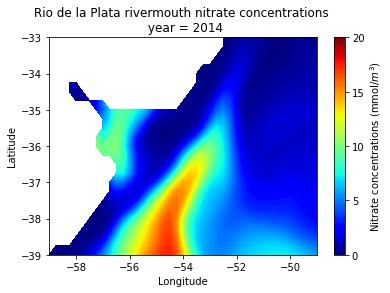

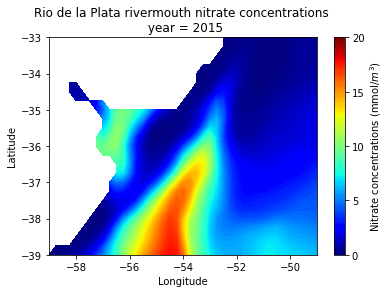

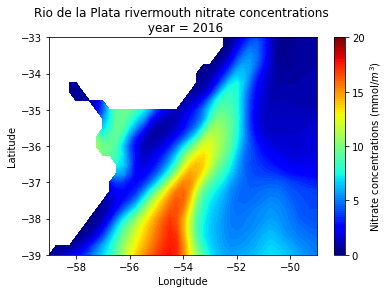

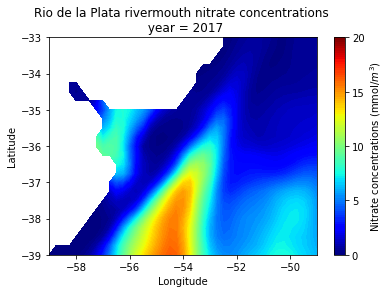

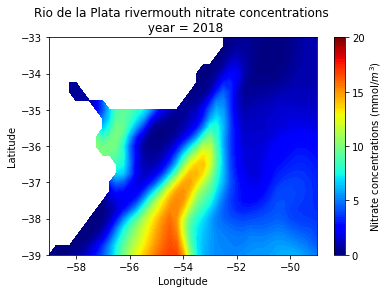

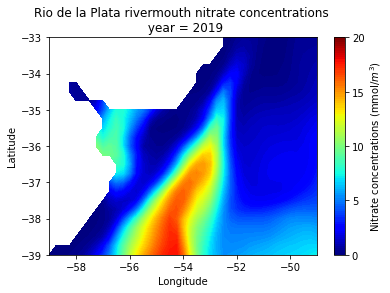

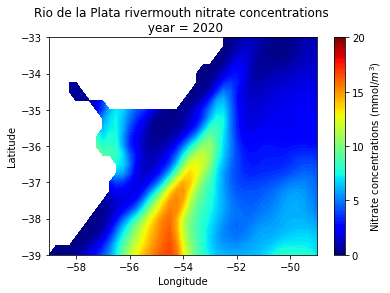

In [11]:
# Creating nitrate plots for each year
tick = [0,5,10,15,20]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    fg = mean.no3.isel(year=i, depth=0).plot.contourf(
         vmin=0, vmax=20, levels=100, cmap = 'jet', 
         cbar_kwargs={"label": "Nitrate concentrations (mmol/$m^3$)",'ticks': tick}
         )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Rio de la Plata rivermouth nitrate concentrations \n year = {}'.format(i+2005))

    #plt.savefig("no3_{}".format(i), dpi=500)
    plt.show()
    plt.close("all")

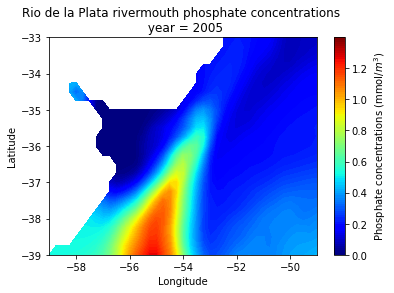

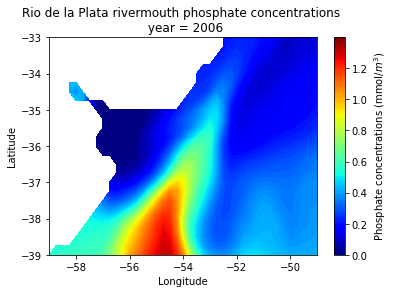

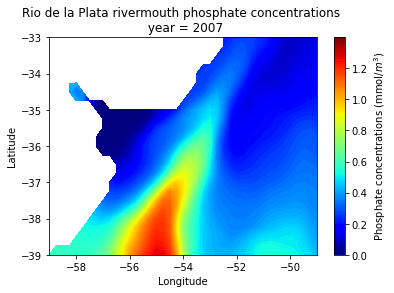

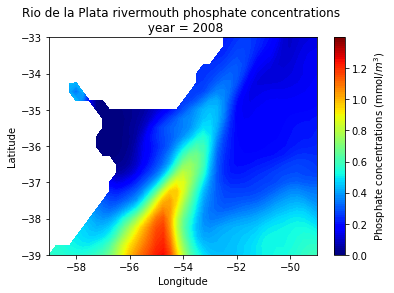

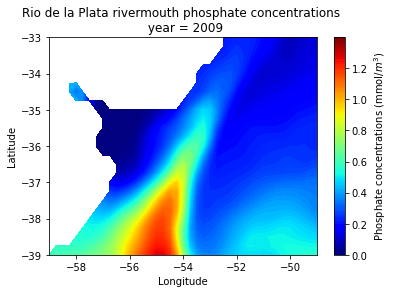

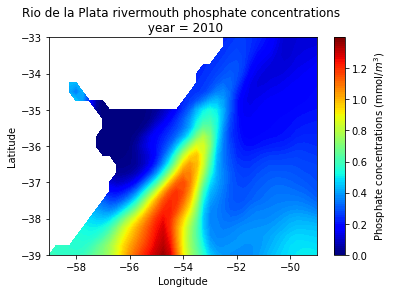

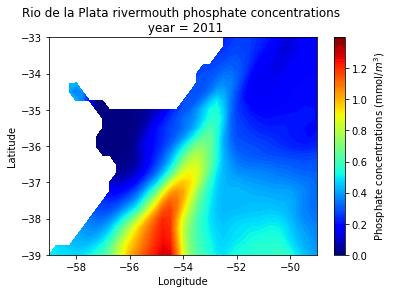

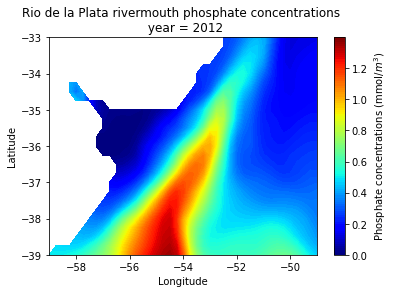

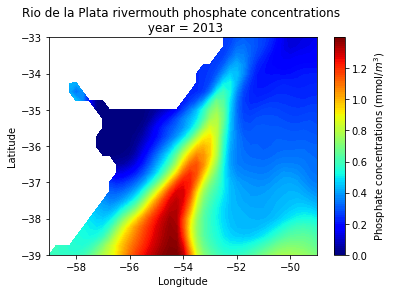

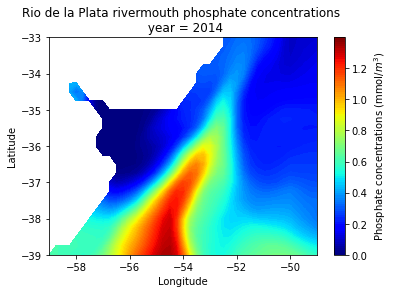

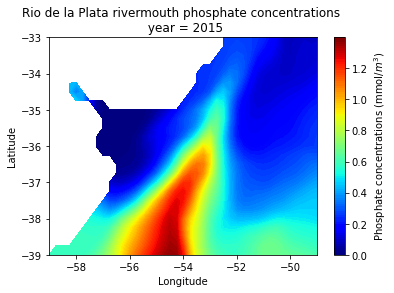

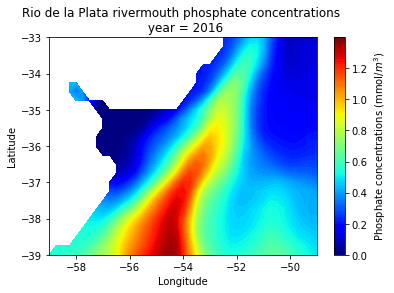

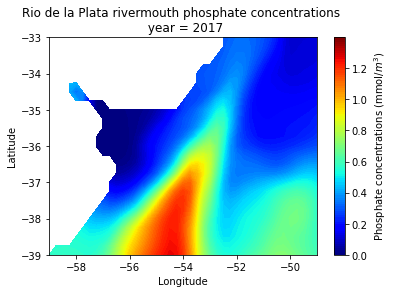

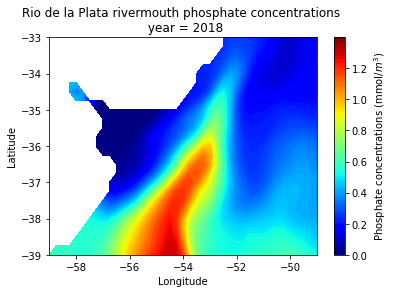

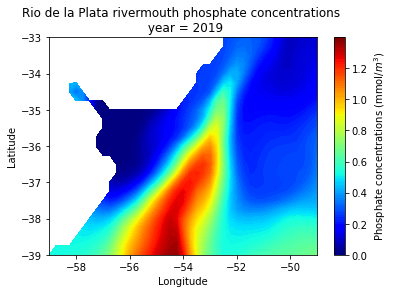

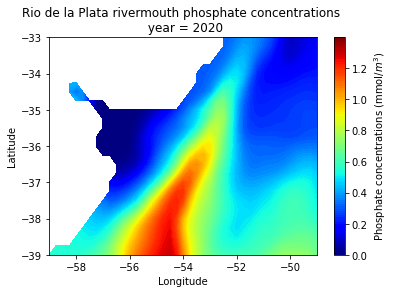

In [24]:
# Creating phosphate plots for each year
tick = [0, 0.2, 0.4, 0.6,0.8,1,1.2,1.4]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    mean.po4.isel(year=i, depth=0).plot.contourf(
        vmin=0, vmax=1.399, levels=100, cmap = 'jet',
        cbar_kwargs={"label": "Phosphate concentrations (mmol/$m^3$)", 'ticks': tick}
        )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Rio de la Plata rivermouth phosphate concentrations \n year = {}'.format(i+2005))

    #plt.savefig("po4_{}".format(i), dpi=500)
    plt.show()
    plt.close("all")

**Variación estacional de los nutrientes**

In [10]:
#Is there a seasonality of nutrient concentration in the area?
meanmonth=ds.groupby("time.month").mean() #calculamos promedios mensuales entre 2005-2020
prom_mes=meanmonth.to_dataframe() #pasar a pandas df
prom_mes=prom_mes.reset_index()
prom_mes

,month,latitude,longitude,depth,spco2,o2,chl,no3,po4,phyc,si,ph,nppv,fe
0,1,-39.0,-59.00,0.50576,45.187374,238.073486,0.289655,0.013931,0.519617,2.505551,4.337000,7.997804,5.569004,0.002466
1,1,-39.0,-58.75,0.50576,44.843071,238.664001,0.267374,0.008299,0.510695,2.341671,4.038353,8.000232,4.723726,0.001999
2,1,-39.0,-58.50,0.50576,44.288036,239.124207,0.255600,0.009094,0.500203,2.257858,3.764810,8.004152,5.076139,0.001578
3,1,-39.0,-58.25,0.50576,43.797340,239.853775,0.261183,0.016169,0.487376,2.271781,3.562467,8.007343,6.126139,0.001298
4,1,-39.0,-58.00,0.50576,43.303650,240.237427,0.254224,0.040211,0.473030,2.226319,3.285811,8.010425,7.041750,0.001023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,12,-33.0,-50.00,0.50576,38.461403,216.558823,0.186567,0.022122,0.073415,1.535101,1.098373,8.058774,7.130364,0.000450
12296,12,-33.0,-49.75,0.50576,38.174778,217.412598,0.174245,0.029463,0.070017,1.415949,1.102376,8.061825,6.516574,0.000294
12297,12,-33.0,-49.50,0.50576,37.777485,219.003723,0.172366,0.026651,0.072193,1.391908,1.087480,8.065439,6.563256,0.000233
12298,12,-33.0,-49.25,0.50576,37.654472,220.109055,0.177583,0.030577,0.075404,1.396671,1.079320,8.066364,6.818915,0.000209


Text(0.5, 0, 'Month')

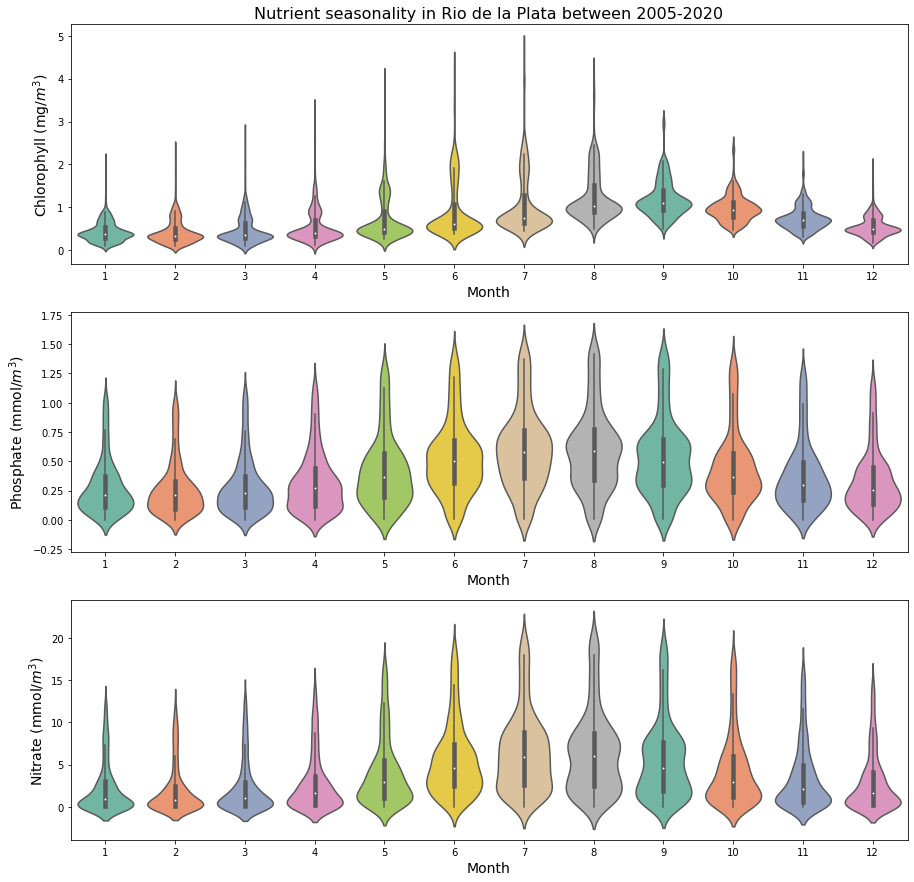

In [11]:
#plotting seasonality in nutrient concentrations

fig, axs = plt.subplots(3, 1,figsize=(15,15))

violinplot1= sn.violinplot(x="month", y="chl", data=prom_mes, palette="Set2", gridsize=200, width=0.8, 
              scale="width", ax=axs[0])
violinplot1.set_ylabel("Chlorophyll (mg/$m^3$)", fontsize=14)
violinplot1.set_xlabel("Month", fontsize=14)
violinplot1.set_title("Nutrient seasonality in Rio de la Plata between 2005-2020", fontsize=16)
violinplot2= sn.violinplot(x="month", y="po4", data=prom_mes, palette="Set2", gridsize=200, width=0.8, 
              scale="width", ax=axs[1])
violinplot2.set_ylabel("Phosphate (mmol/$m^3$)", fontsize=14)
violinplot2.set_xlabel("Month", fontsize=14)
violinplot3= sn.violinplot(x="month", y="no3", data=prom_mes, palette="Set2", gridsize=200, width=0.8, 
              scale="width", ax=axs[2])
violinplot3.set_ylabel("Nitrate (mmol/$m^3$)", fontsize=14)
violinplot3.set_xlabel("Month", fontsize=14) 

#plt.savefig("Violinplot_estacionales_RDP{}".format(i))
